# Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
import seaborn as sns
import pickle

import cartopy.crs as ccrs
import cartopy.util as cutil
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

from sklearn import preprocessing, cluster

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn import metrics
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [37]:
import datetime
import geopy
import folium

# Import Data

In [38]:
data = pd.read_csv("datagempah.csv")
data

tgl  tanggal_angka       ot   lat     lon  depth  mag  \
0     11/1/2022        44866.0  16:13.0 -2.61  134.44     18  3.6   
1     11/1/2022        44866.0  56:20.1 -9.23  106.70     10  4.3   
2     11/1/2022        44866.0  07:45.9 -3.74  129.35     10  3.7   
3     11/1/2022        44866.0  58:34.9 -9.03  119.23     10  3.6   
4     11/1/2022        44866.0  04:57.9 -0.27  124.46     12  3.4   
...         ...            ...      ...   ...     ...    ...  ...   
3497  1/26/2023        44952.0  25:09.3  3.24  127.18     10  4.0   
3498  1/26/2023        44952.0  15:03.9  2.70  127.10     10  3.9   
3499  1/26/2023        44952.0  57:08.9 -7.83  121.07     10  3.8   
3500  1/26/2023        44952.0  46:21.0  3.00  127.16     10  4.1   
3501  1/26/2023        44952.0  00:35.2 -8.87  118.95     10  2.4   

                             remark  strike1  dip1  rake1  strike2  dip2  \
0     Irian Jaya Region - Indonesia      NaN   NaN    NaN      NaN   NaN   
1         South of Java - Indonesia      NaN   NaN    NaN      NaN   NaN   
2                 Seram - Indonesia      NaN   NaN    NaN      NaN   NaN   
3          Sumba Region - Indonesia      NaN   NaN    NaN      NaN   NaN   
4              Southern Molucca Sea      NaN   NaN    NaN      NaN   NaN   
...                             ...      ...   ...    ...      ...   ...   
3497     Talaud Islands - Indonesia      NaN   NaN    NaN      NaN   NaN   
3498           Northern Molucca Sea      NaN   NaN    NaN      NaN   NaN   
3499                     Flores Sea      NaN   NaN    NaN      NaN   NaN   
3500           Northern Molucca Sea      NaN   NaN    NaN      NaN   NaN   
3501     Sumbawa Region - Indonesia      NaN   NaN    NaN      NaN   NaN   

      rake2  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
3497    NaN  
3498    NaN  
3499    NaN  
3500    NaN  
3501    NaN  

[3502 rows x 14 columns]

# Exploratory Data Analysis

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3502 entries, 0 to 3501
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tgl            3502 non-null   object 
 1   tanggal_angka  3502 non-null   float64
 2   ot             3502 non-null   object 
 3   lat            3502 non-null   float64
 4   lon            3502 non-null   float64
 5   depth          3502 non-null   int64  
 6   mag            3502 non-null   float64
 7   remark         3502 non-null   object 
 8   strike1        129 non-null    float64
 9   dip1           129 non-null    float64
 10  rake1          129 non-null    float64
 11  strike2        129 non-null    float64
 12  dip2           129 non-null    float64
 13  rake2          129 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 383.2+ KB


Rata-rata magnitudo gempa bumi di Indonesia adalah:  3.2714163335237005


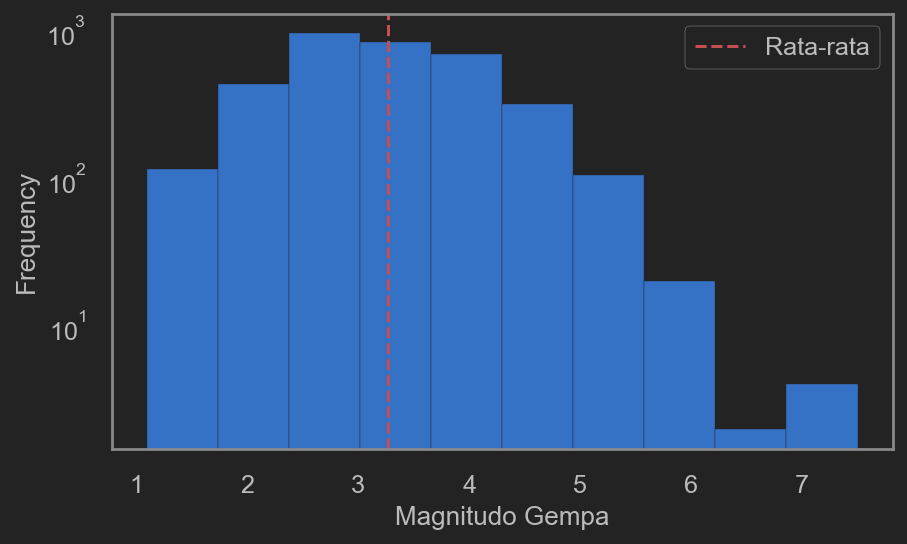

In [40]:
plt.figure(figsize = [7, 4])


plt.hist(np.array(data.mag), log=True);
plt.xlabel("Magnitudo Gempa", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);
mean_mag = np.mean(data.mag)
plt.axvline(x=mean_mag, color='r', linestyle='--', label='Rata-rata')
plt.legend()
print("Rata-rata magnitudo gempa bumi di Indonesia adalah: ", mean_mag)

Rata-rata kedalaman gempa bumi di Indonesia adalah:  40.9571673329526


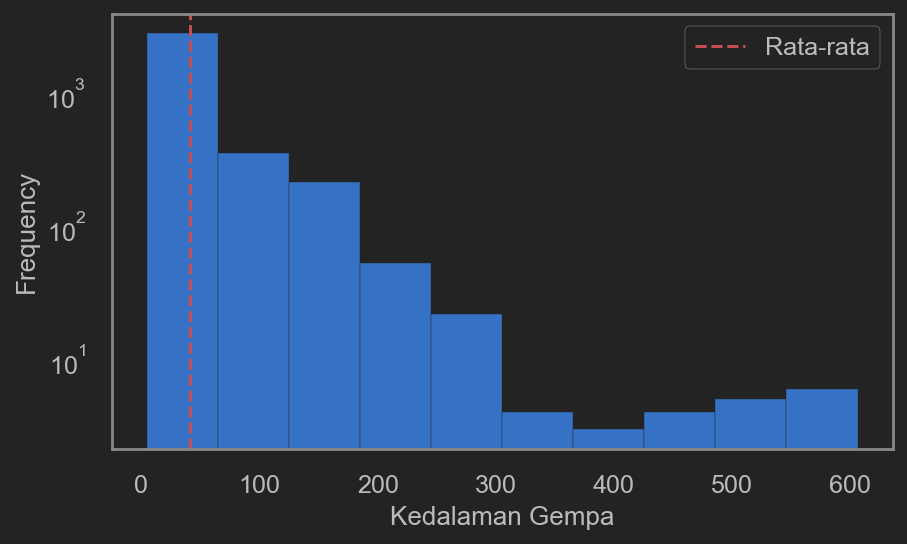

In [41]:
plt.figure(figsize = [7, 4])
plt.hist(np.array(data.depth), log=True);
plt.xlabel("Kedalaman Gempa", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);
mean_depth = np.mean(data.depth)
plt.axvline(x=mean_depth, color='r', linestyle='--', label='Rata-rata')
plt.legend()
print("Rata-rata kedalaman gempa bumi di Indonesia adalah: ", mean_depth)

Rata-rata longitude gempa bumi di Indonesia adalah:  118.66200742432835


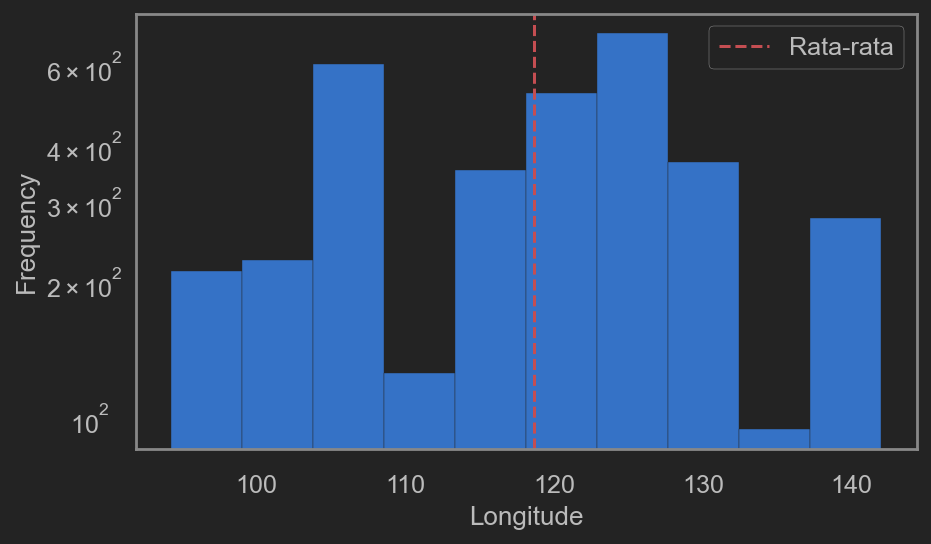

In [42]:
plt.figure(figsize = [7, 4])
plt.hist(np.array(data.lon), log=True);
plt.xlabel("Longitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);
mean_lon = np.mean(data.lon)
plt.axvline(x=mean_lon, color='r', linestyle='--', label='Rata-rata')
plt.legend()
print("Rata-rata longitude gempa bumi di Indonesia adalah: ", mean_lon)

Rata-rata latitude gempa bumi di Indonesia adalah:  -3.6783438035408333


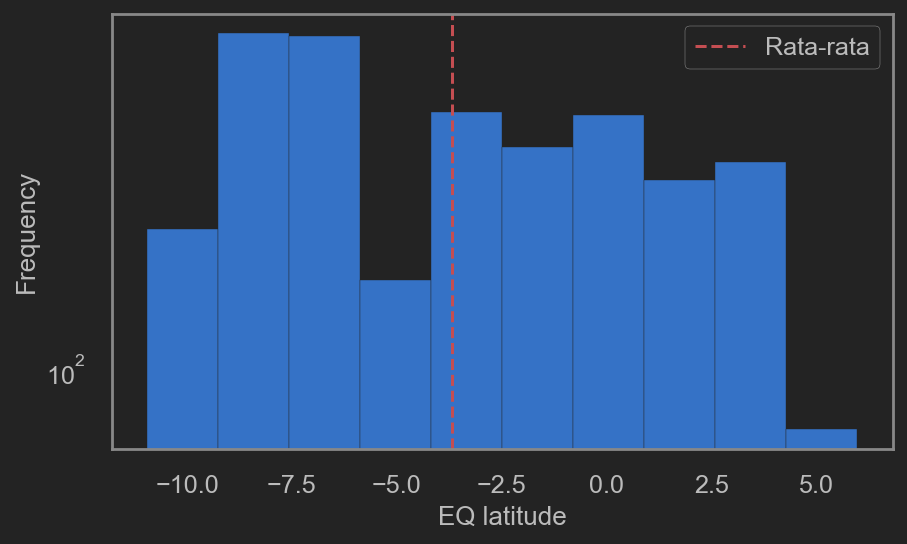

In [43]:
plt.figure(figsize = [7, 4])
plt.hist(np.array(data.lat), log=True);
plt.xlabel("EQ latitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);
mean_lat = np.mean(data.lat)
plt.axvline(x=mean_lat, color='r', linestyle='--', label='Rata-rata')
plt.legend()
print("Rata-rata latitude gempa bumi di Indonesia adalah: ", mean_lat)

Rata-rata latitude gempa bumi di Indonesia adalah:  -3.6783438035408333


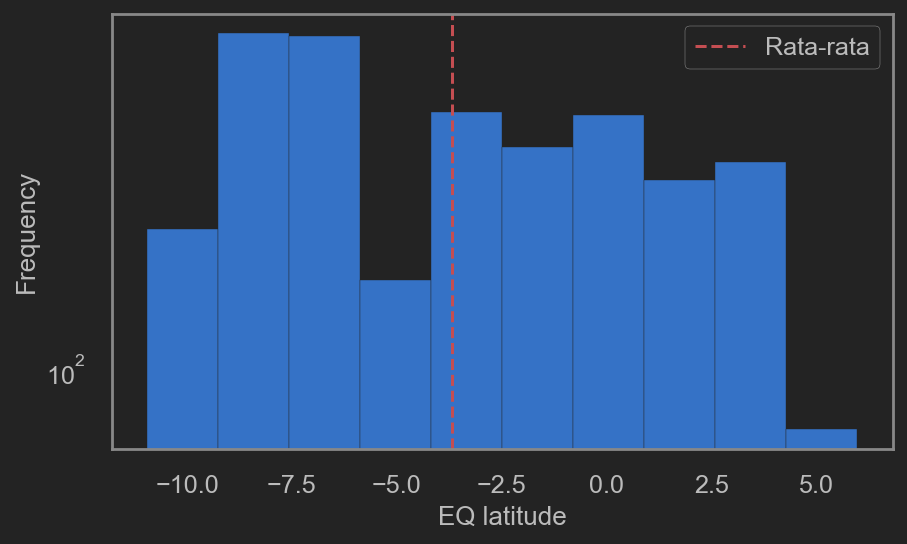

In [44]:
plt.figure(figsize = [7, 4])
plt.hist(np.array(data.lat), log=True);
plt.xlabel("EQ latitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);
mean_lat = np.mean(data.lat)
plt.axvline(x=mean_lat, color='r', linestyle='--', label='Rata-rata')
plt.legend()
print("Rata-rata latitude gempa bumi di Indonesia adalah: ", mean_lat)

Data dengan Magnitudo >6 Skala Ritcher

In [45]:
data_large = data[data["mag"]>6].copy()

In [46]:
data_large.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 501 to 3120
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tgl            12 non-null     object 
 1   tanggal_angka  12 non-null     float64
 2   ot             12 non-null     object 
 3   lat            12 non-null     float64
 4   lon            12 non-null     float64
 5   depth          12 non-null     int64  
 6   mag            12 non-null     float64
 7   remark         12 non-null     object 
 8   strike1        6 non-null      float64
 9   dip1           6 non-null      float64
 10  rake1          6 non-null      float64
 11  strike2        6 non-null      float64
 12  dip2           6 non-null      float64
 13  rake2          6 non-null      float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.4+ KB


In [47]:
data_large = data[data["mag"]>6].copy()
data_large

tgl  tanggal_angka       ot   lat     lon  depth  mag  \
501   11/18/2022        44883.0  37:08.0 -4.89  100.66     22  6.7   
502   11/18/2022        44883.0  37:08.0 -4.89  100.66     22  6.7   
1268   12/3/2022        44898.0  49:42.1 -7.33  107.55    119  6.1   
1269   12/3/2022        44898.0  49:42.1 -7.33  107.55    119  6.1   
2702    1/9/2023        44935.0  47:34.2 -7.38  130.18    122  7.5   
2703    1/9/2023        44935.0  47:34.2 -7.38  130.18    122  7.5   
2924   1/15/2023        44941.0  30:03.0  1.97   97.91     47  6.2   
2925   1/15/2023        44941.0  30:03.0  1.97   97.91     47  6.2   
3108   1/18/2023        44944.0  06:16.1  2.82  127.04     69  7.0   
3109   1/18/2023        44944.0  06:16.1  2.82  127.04     69  7.0   
3119   1/18/2023        44944.0  34:46.4 -0.02  123.27    144  6.1   
3120   1/18/2023        44944.0  34:46.4 -0.02  123.27    144  6.1   

                                 remark  strike1  dip1  rake1  strike2  dip2  \
501    Southwest of Sumatra - Indonesia    150.5  52.9   95.7   321.17  37.5   
502    Southwest of Sumatra - Indonesia      NaN   NaN    NaN      NaN   NaN   
1268                   Java - Indonesia    154.2  71.7   23.4    56.52  67.9   
1269                   Java - Indonesia      NaN   NaN    NaN      NaN   NaN   
2702  Tanimbar Islands Reg. - Indonesia    102.1  26.0   40.6   334.48  73.4   
2703  Tanimbar Islands Reg. - Indonesia      NaN   NaN    NaN      NaN   NaN   
2924       Northern Sumatra - Indonesia    126.3  68.4   70.8   349.66  28.6   
2925       Northern Sumatra - Indonesia      NaN   NaN    NaN      NaN   NaN   
3108               Northern Molucca Sea    127.1  88.8    8.0    36.89  82.0   
3109               Northern Molucca Sea      NaN   NaN    NaN      NaN   NaN   
3119     Minahassa Peninsula - Sulawesi     71.3  56.3   94.6   243.10  34.0   
3120     Minahassa Peninsula - Sulawesi      NaN   NaN    NaN      NaN   NaN   

      rake2  
501    82.6  
502     NaN  
1268  160.2  
1269    NaN  
2702  110.3  
2703    NaN  
2924  129.6  
2925    NaN  
3108  178.8  
3109    NaN  
3119   83.2  
3120    NaN

In [48]:
import cartopy.feature as cfeature

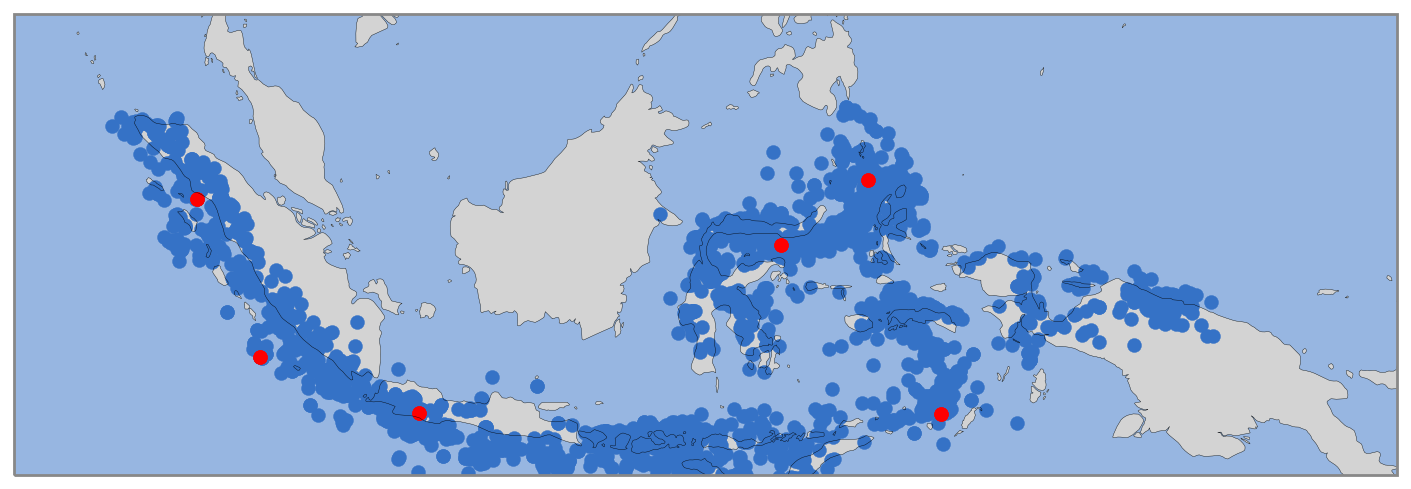

In [49]:
fig = plt.figure(figsize=(10, 10), facecolor="white", tight_layout=True)
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator(central_longitude=25.0), facecolor="azure")
ax.set_global()
ax.coastlines()
ax.set_extent([90, 150, -10, 10], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(draw_labels=True)
gl.xlocator = mticker.FixedLocator(np.arange(15, 40, 0.5))
gl.ylocator = mticker.FixedLocator(np.arange(30, 50, 0.5))

ax.scatter(data["lon"], data["lat"],transform=ccrs.PlateCarree())
ax.scatter(data_large["lon"], data_large["lat"], color="red", transform=ccrs.PlateCarree())

plt.show()

Text(0, 0.5, 'mag')

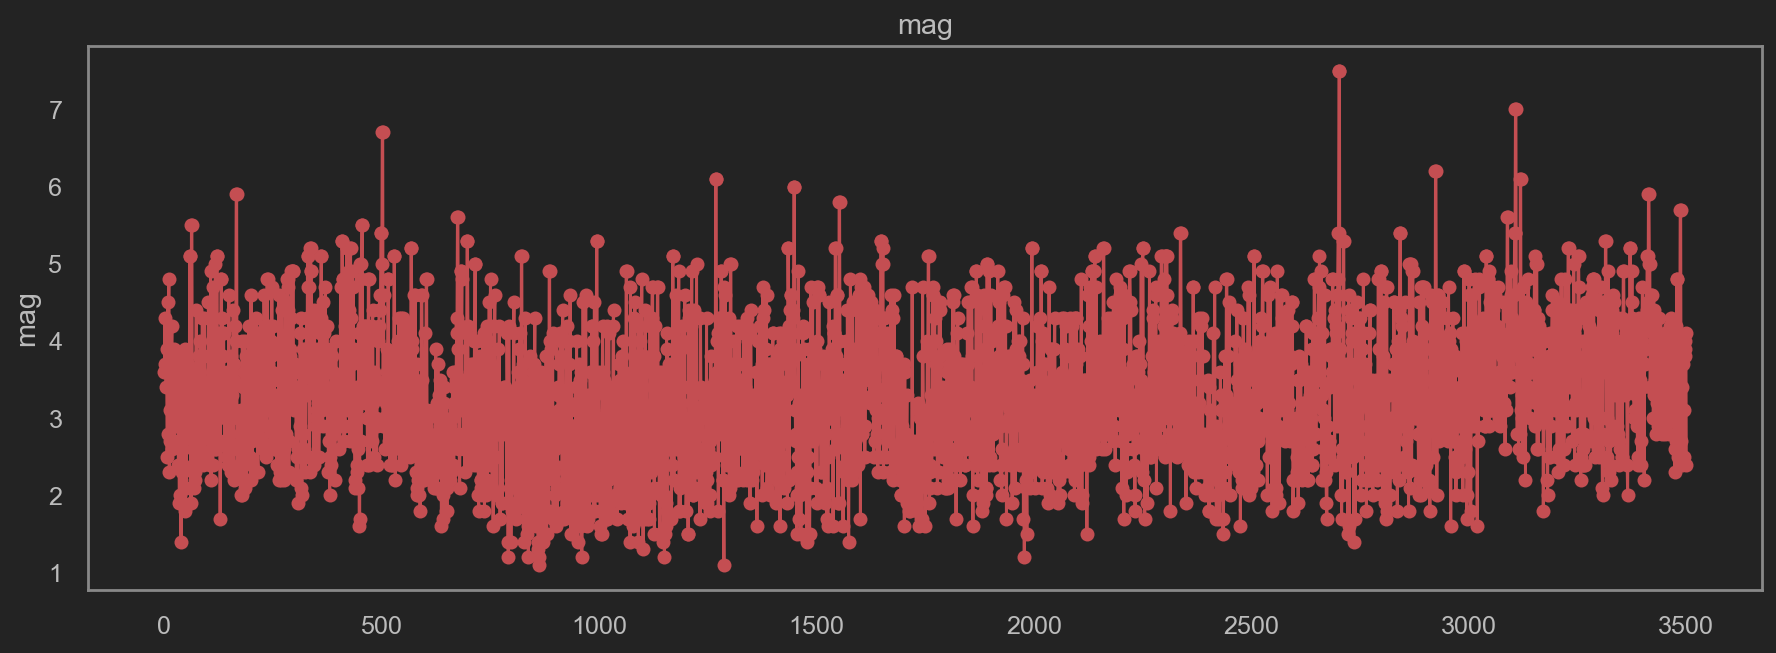

In [50]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(15,5))
data["mag"].plot(style="ro-")

plt.title("mag")
plt.ylabel("mag")

# Preprocessing

In [51]:
data.duplicated().sum() #mengecek variabel yang duplikat

0

In [52]:
data.drop_duplicates()

tgl  tanggal_angka       ot   lat     lon  depth  mag  \
0     11/1/2022        44866.0  16:13.0 -2.61  134.44     18  3.6   
1     11/1/2022        44866.0  56:20.1 -9.23  106.70     10  4.3   
2     11/1/2022        44866.0  07:45.9 -3.74  129.35     10  3.7   
3     11/1/2022        44866.0  58:34.9 -9.03  119.23     10  3.6   
4     11/1/2022        44866.0  04:57.9 -0.27  124.46     12  3.4   
...         ...            ...      ...   ...     ...    ...  ...   
3497  1/26/2023        44952.0  25:09.3  3.24  127.18     10  4.0   
3498  1/26/2023        44952.0  15:03.9  2.70  127.10     10  3.9   
3499  1/26/2023        44952.0  57:08.9 -7.83  121.07     10  3.8   
3500  1/26/2023        44952.0  46:21.0  3.00  127.16     10  4.1   
3501  1/26/2023        44952.0  00:35.2 -8.87  118.95     10  2.4   

                             remark  strike1  dip1  rake1  strike2  dip2  \
0     Irian Jaya Region - Indonesia      NaN   NaN    NaN      NaN   NaN   
1         South of Java - Indonesia      NaN   NaN    NaN      NaN   NaN   
2                 Seram - Indonesia      NaN   NaN    NaN      NaN   NaN   
3          Sumba Region - Indonesia      NaN   NaN    NaN      NaN   NaN   
4              Southern Molucca Sea      NaN   NaN    NaN      NaN   NaN   
...                             ...      ...   ...    ...      ...   ...   
3497     Talaud Islands - Indonesia      NaN   NaN    NaN      NaN   NaN   
3498           Northern Molucca Sea      NaN   NaN    NaN      NaN   NaN   
3499                     Flores Sea      NaN   NaN    NaN      NaN   NaN   
3500           Northern Molucca Sea      NaN   NaN    NaN      NaN   NaN   
3501     Sumbawa Region - Indonesia      NaN   NaN    NaN      NaN   NaN   

      rake2  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
3497    NaN  
3498    NaN  
3499    NaN  
3500    NaN  
3501    NaN  

[3502 rows x 14 columns]

In [53]:
data.isna().sum()

tgl                 0
tanggal_angka       0
ot                  0
lat                 0
lon                 0
depth               0
mag                 0
remark              0
strike1          3373
dip1             3373
rake1            3373
strike2          3373
dip2             3373
rake2            3373
dtype: int64

In [54]:
missing = data.isna().sum()
missing = missing[missing>0]
missing = missing.reset_index()
tr = go.Bar(x=missing['index'],y=missing[0],name='Missing')
tr2 = go.Bar(x=missing['index'],y=[data.shape[0]]*len(missing['index']),name='Total')

data_mv = [tr2,tr]
fig = go.Figure(data=data_mv,layout={'title':'Proportion Of Missing Values In Our Dataset','barmode':'overlay'})
fig.show()

In [55]:
data = data.drop(['tgl','strike1','dip1','rake1','strike2','dip2','rake2','ot','remark'], axis=1)

In [56]:
data

tanggal_angka   lat     lon  depth  mag
0           44866.0 -2.61  134.44     18  3.6
1           44866.0 -9.23  106.70     10  4.3
2           44866.0 -3.74  129.35     10  3.7
3           44866.0 -9.03  119.23     10  3.6
4           44866.0 -0.27  124.46     12  3.4
...             ...   ...     ...    ...  ...
3497        44952.0  3.24  127.18     10  4.0
3498        44952.0  2.70  127.10     10  3.9
3499        44952.0 -7.83  121.07     10  3.8
3500        44952.0  3.00  127.16     10  4.1
3501        44952.0 -8.87  118.95     10  2.4

[3502 rows x 5 columns]

Atribut <b>dip1, strike1, rake1, dip2, strike2, dan rake2, ot dan remark</b> dihapus karena tidak dibutuhkan dalam parameter untuk pengklasteran

# Penentuan Parameter untuk algoritma ST-DBSCAN

In [57]:
from scipy.spatial.distance import pdist, squareform
from st_dbscan import ST_DBSCAN

In [58]:
#Menghtiung jarak spasial antar data gempa bumi
spatial = data[['lat', 'lon']]
print(spatial)

       lat     lon
0    -2.61  134.44
1    -9.23  106.70
2    -3.74  129.35
3    -9.03  119.23
4    -0.27  124.46
...    ...     ...
3497  3.24  127.18
3498  2.70  127.10
3499 -7.83  121.07
3500  3.00  127.16
3501 -8.87  118.95

[3502 rows x 2 columns]


In [59]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(spatial)
distances, indices = neighbors_fit.kneighbors(spatial)

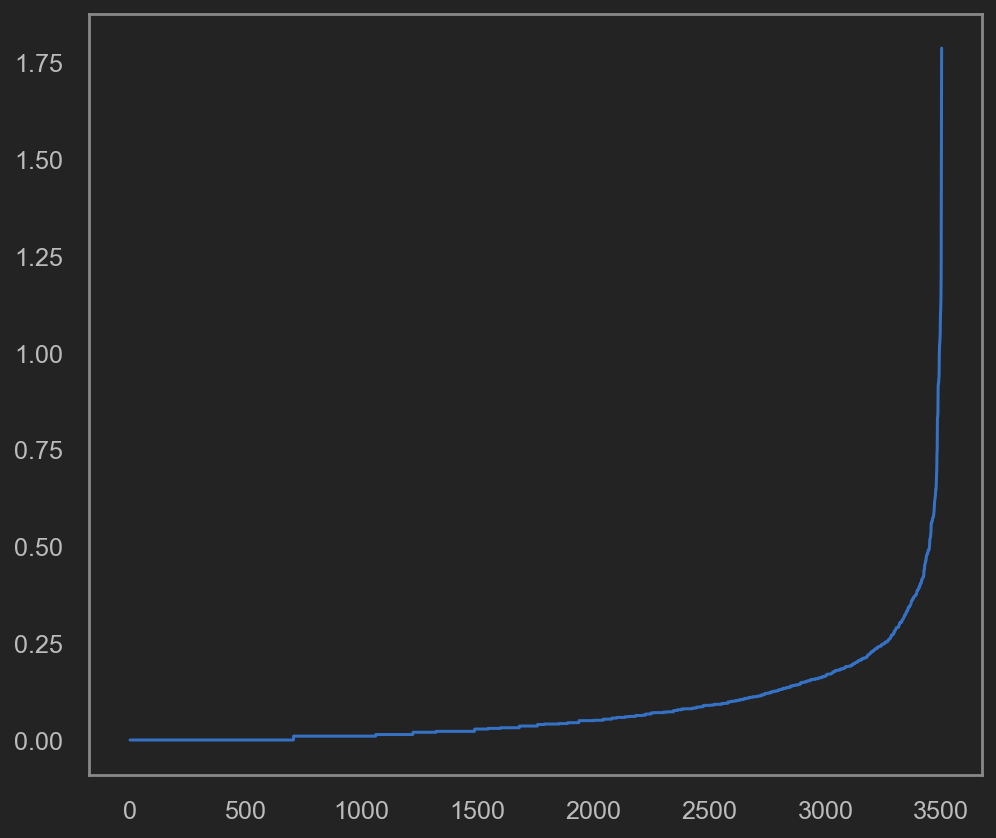

In [60]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [61]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_model.fit(spatial)
distances, indices = nn_model.kneighbors(spatial)

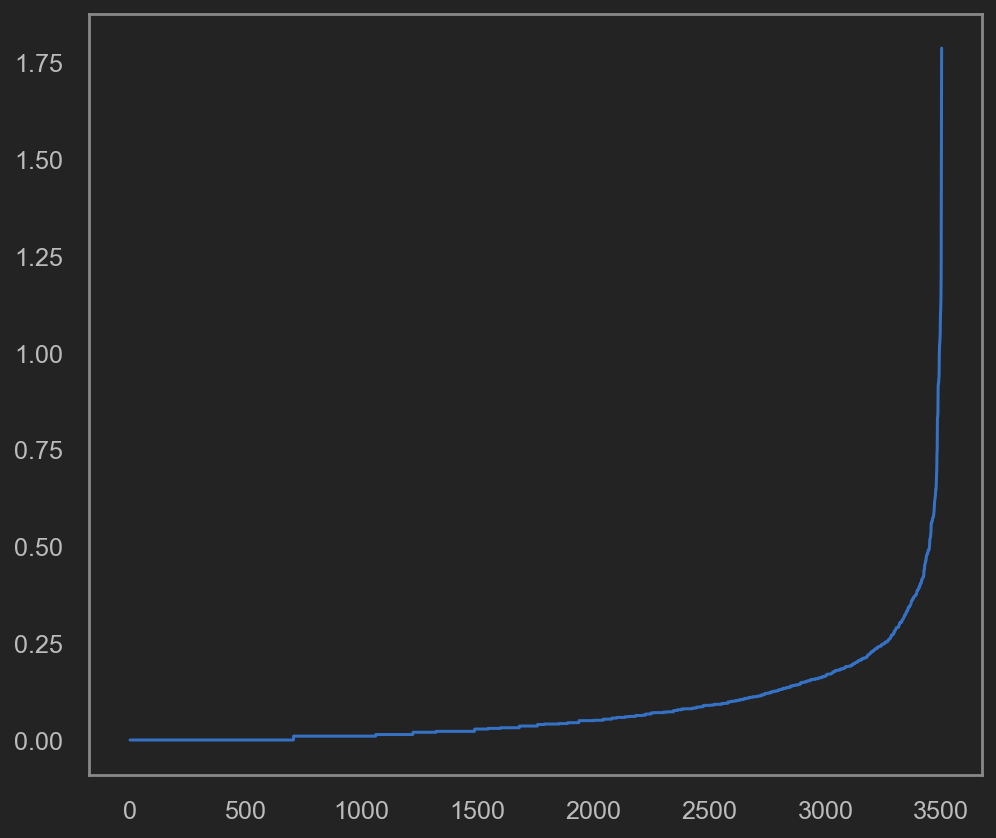

In [62]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [63]:
#Clustering DBSCAN
from sklearn.cluster import KMeans,DBSCAN
DB = DBSCAN(eps=0.5,algorithm='ball_tree',min_samples=15)
data_2 = data.copy()
DB.fit(data_2[['mag','depth']])
data_2['Cluster'] = DB.labels_

fig = ex.scatter_3d(data_2 ,x='lon',y='depth',z='mag', color ='Cluster',height=900)
fig.show()

# Implementasi Algoritma ST-DBSCAN

In [64]:
#Clustring
from sklearn.cluster import KMeans,DBSCAN
STDB = ST_DBSCAN(eps1= 2, eps2 = 7, min_samples=5)
# algorithm='ball_tree'
data_2 = data.copy()
STDB.fit(data_2[['mag','depth']])
data_2['Cluster'] = STDB.labels

fig = ex.scatter_3d(data_2 ,x='tanggal_angka',y='depth',z='mag', color ='Cluster',height=900)
fig.show()

In [65]:
data_cluster

tanggal_angka   lat     lon  cluster
0           44866.0 -2.61  134.44       -1
1           44866.0 -9.23  106.70        0
2           44866.0 -3.74  129.35        2
3           44866.0 -9.03  119.23        0
4           44866.0 -0.27  124.46        1
...             ...   ...     ...      ...
3497        44952.0  3.24  127.18        1
3498        44952.0  2.70  127.10        1
3499        44952.0 -7.83  121.07        0
3500        44952.0  3.00  127.16        1
3501        44952.0 -8.87  118.95        0

[3502 rows x 4 columns]

In [66]:
from sklearn.preprocessing import StandardScaler
data_cluster = data.loc[:,["tanggal_angka","lat","lon"]]

sts = StandardScaler()
X_scaled = sts.fit_transform(data_cluster)

eps_1 = 0.25
eps_2 = 1
min_pts = 50

stdbscan = ST_DBSCAN(eps_1,eps_2,min_pts)

st_db = stdbscan.fit(X_scaled)

print(st_db)

data_cluster['cluster'] = st_db.labels


core_samples_mask = np.zeros_like(st_db.labels, dtype=bool)
# core_samples_mask[st_db.core_sample_indices_] = True
labels = st_db.labels

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Total number of points: %d' % len(X_scaled))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_scaled, labels))

cluster_dict = dict(
                zip(
                    data_cluster.cluster.value_counts().keys(),
                    data_cluster.cluster.value_counts().values
                       )
                   ) 
print("Clusters: ", cluster_dict)

Top_clusters = data_cluster.cluster.value_counts().keys()

if (Top_clusters[0] < 0):
    cluster_mask = Top_clusters[1]
else:
    cluster_mask = Top_clusters[0]

print("Top cluster is: ", cluster_mask)

# dbb = st_db.core_sample_indices_

plt.figure(figsize=(8,8))

clustering_result = data_cluster[data_cluster["cluster"]!=-1]
fig = ex.scatter_3d(clustering_result ,x='lat',y='lon',z='tanggal_angka', color ='cluster',height=900)
fig.show()

Total number of points: 3502
Estimated number of clusters: 6
Estimated number of noise points: 285
Silhouette Coefficient: 0.209
Clusters:  {0: 1503, 1: 938, 4: 292, -1: 285, 2: 202, 3: 201, 5: 81}
Top cluster is:  0


<Figure size 576x576 with 0 Axes>

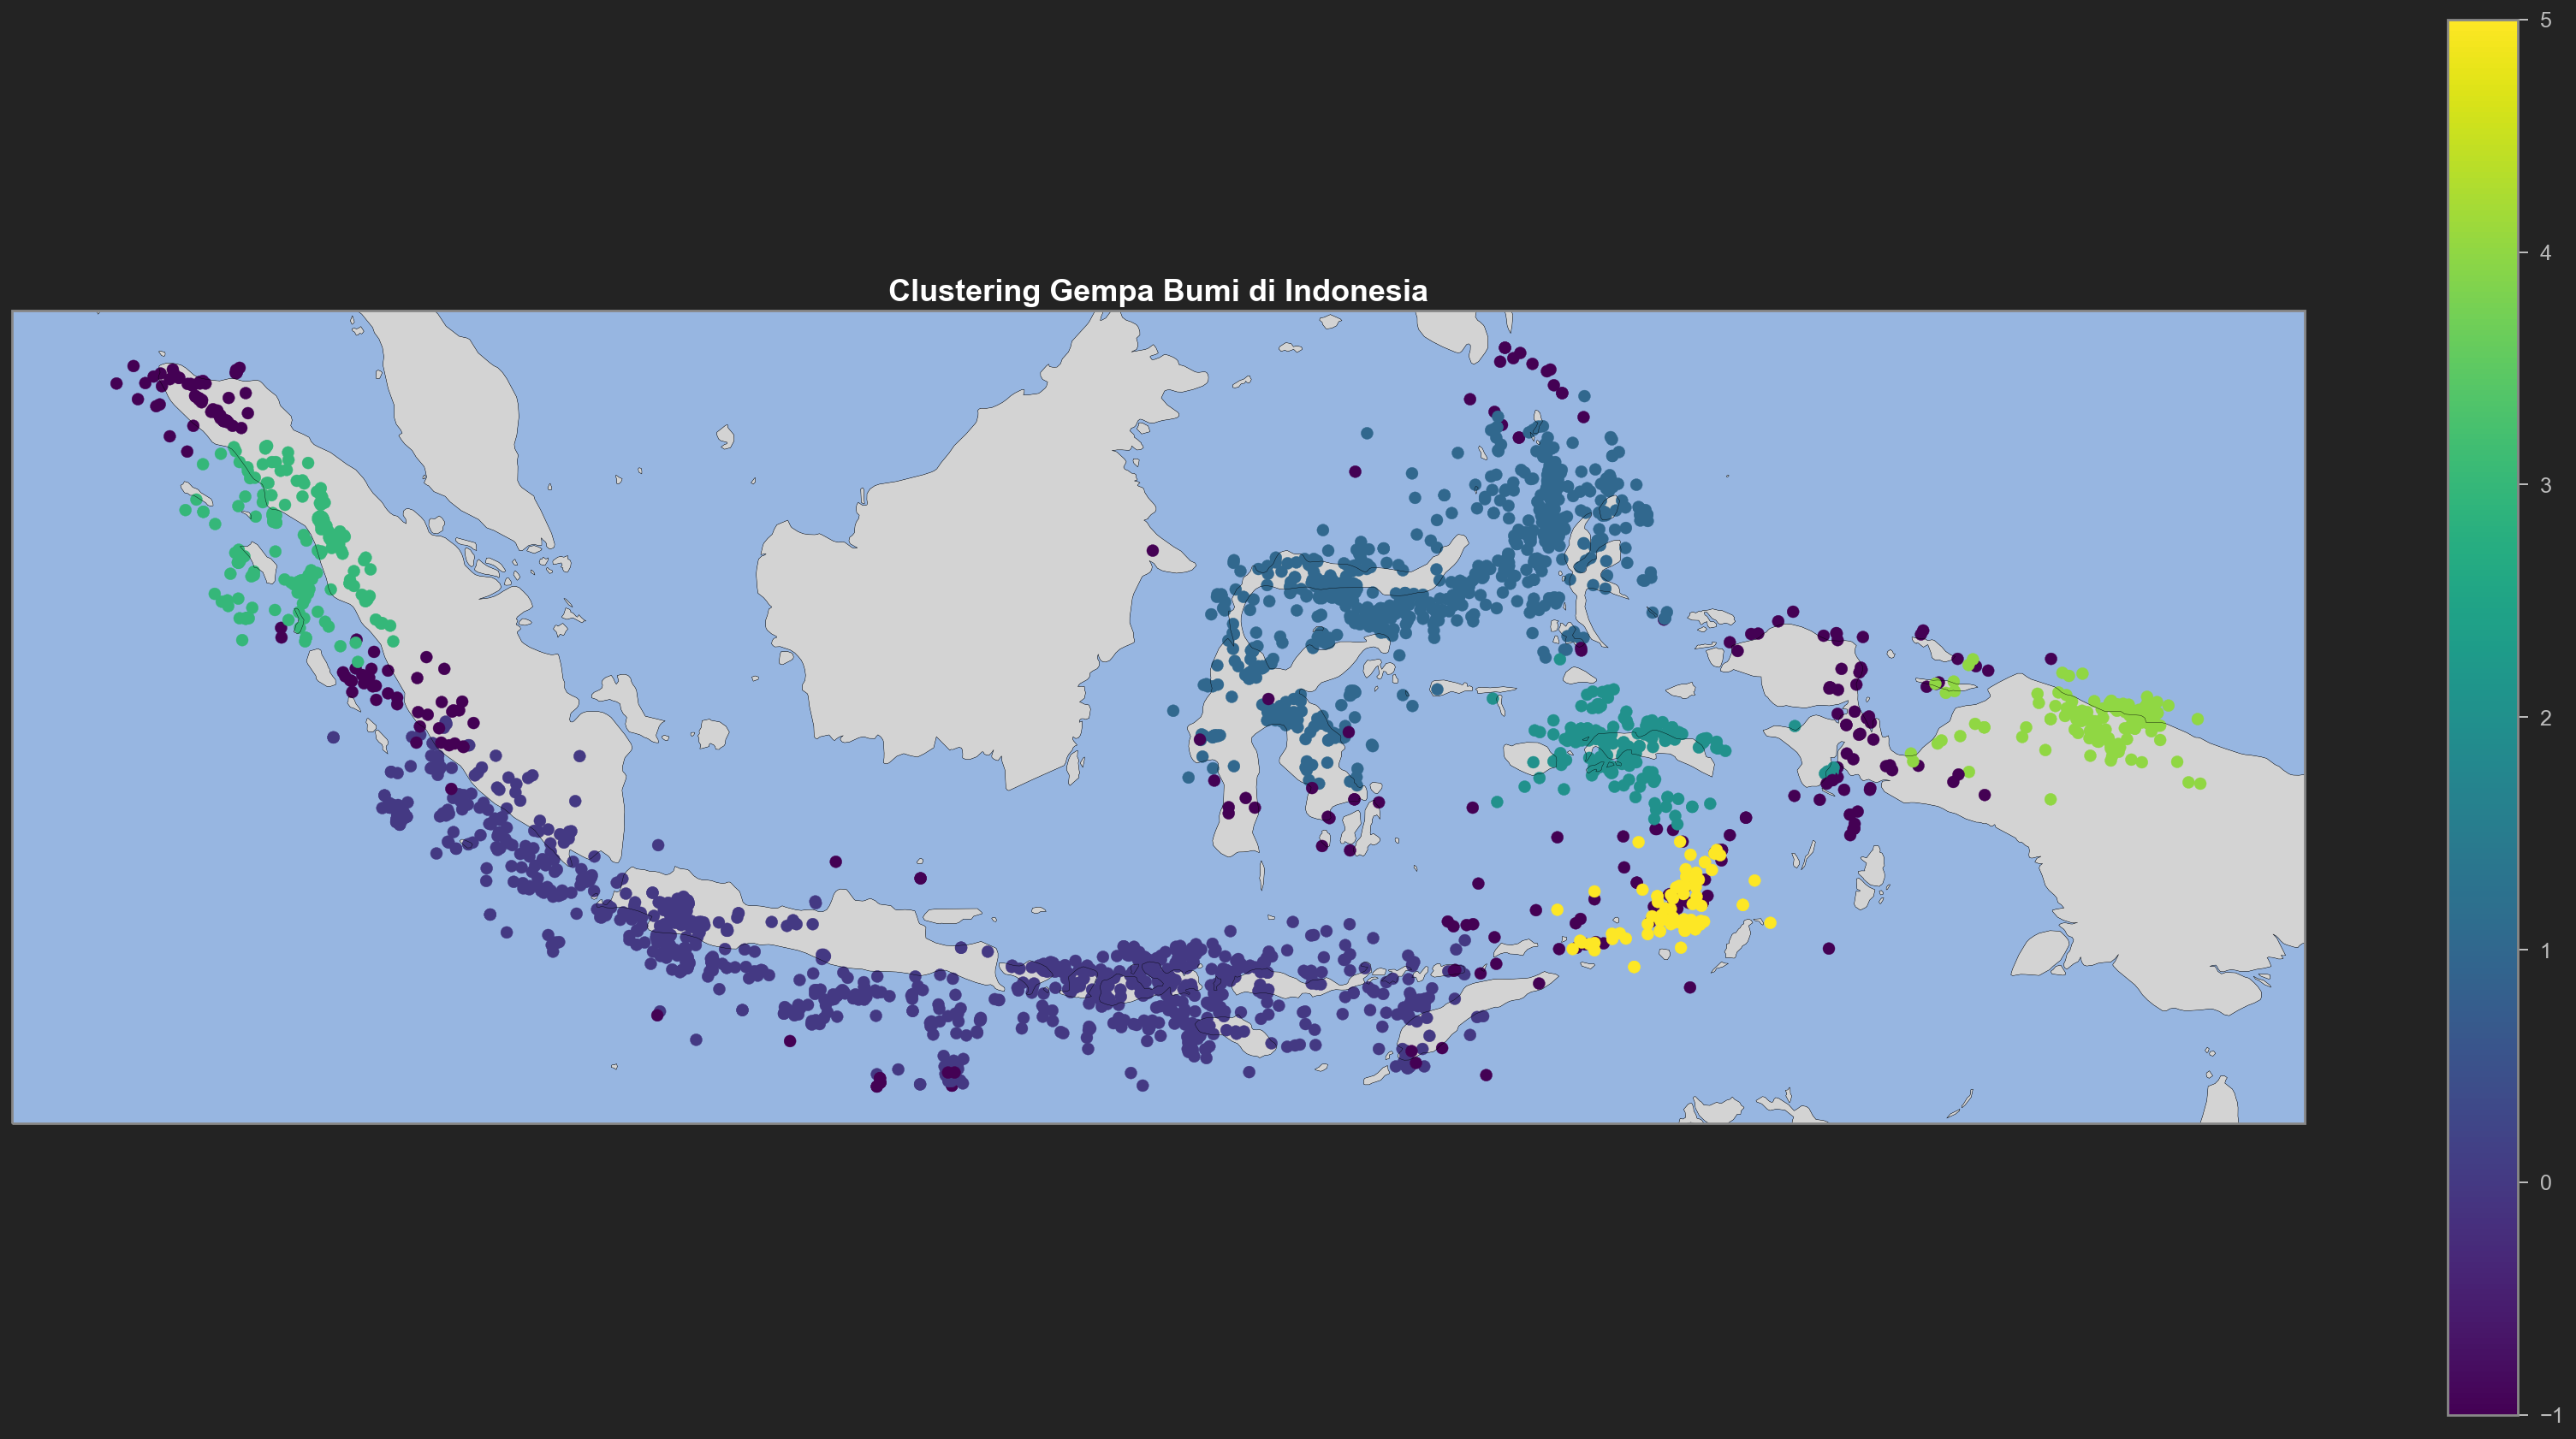

In [67]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

latitude = data['lat']
longitude = data['lon']

#Make a map
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax.set_extent([95, 115, -6, 6], crs=ccrs.PlateCarree()) #Wilayah Sumatera

#add features on the map
ax.coastlines()
ax.add_feature(ccrs.cartopy.feature.LAND, facecolor='lightgray')
ax.add_feature(ccrs.cartopy.feature.OCEAN)

#show cluster distribution with different colors
scatter = ax.scatter(longitude, latitude, c = data_cluster['cluster'] , cmap='viridis', transform=ccrs.PlateCarree())

#add description on the map
plt.colorbar(scatter, ax=ax, shrink=0.5)
plt.title('Clustering Gempa Bumi di Indonesia', fontsize=18, fontweight='bold', color='white')
plt.show()

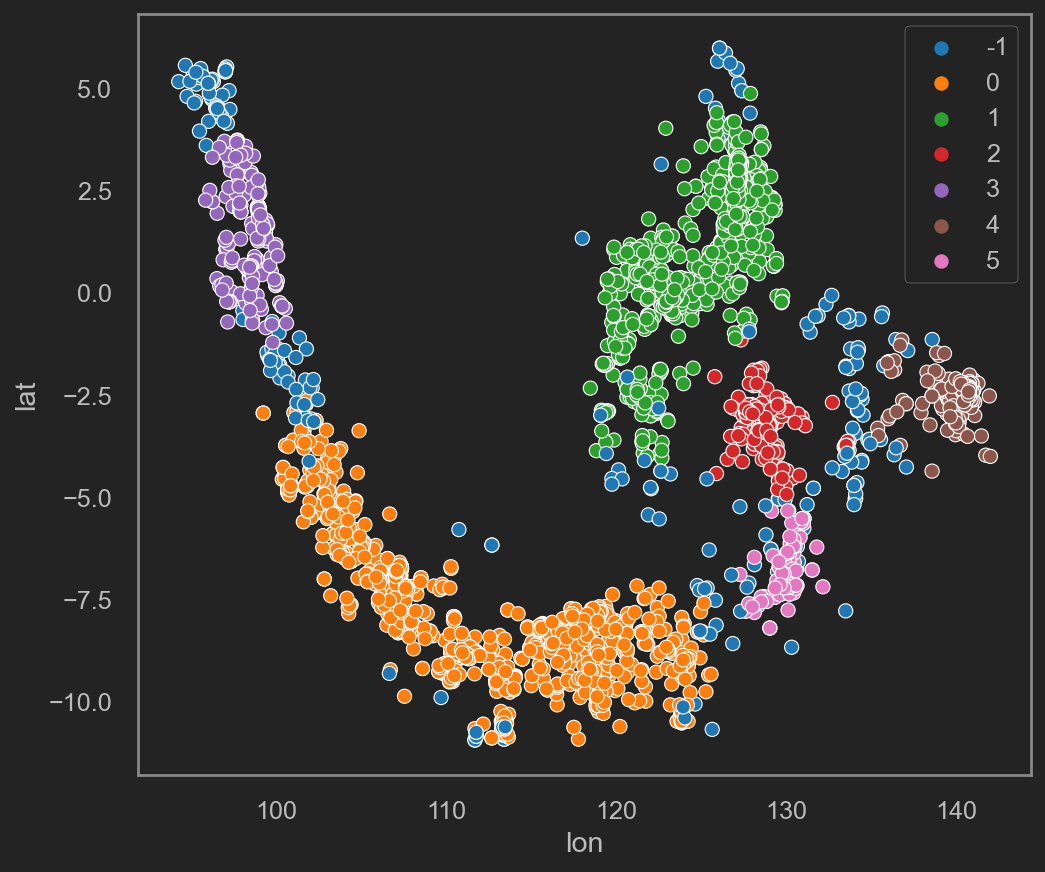

In [68]:
sns.scatterplot(x = data["lon"], y = data["lat"], 
                hue = data_cluster["cluster"], 
                s = 50,
                palette="tab10", legend = "full")


plt.legend(loc='upper right')